In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Gráficos que mostram a evolução da temperatura média entre as cidades

In [2]:
dados = pd.read_csv("GlobalLandTemperaturesByCity.csv")
print(dados.head())

           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  


In [3]:
## Limpeza dos dados utilizando o método .dropna() para remover linhas com valores ausentes 
dados.dropna(inplace=True)

print(dados.head())



           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
5  1744-04-01               5.788                          3.624  Århus   
6  1744-05-01              10.644                          1.283  Århus   
7  1744-06-01              14.051                          1.347  Århus   
8  1744-07-01              16.082                          1.396  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
5  Denmark   57.05N    10.33E  
6  Denmark   57.05N    10.33E  
7  Denmark   57.05N    10.33E  
8  Denmark   57.05N    10.33E  


In [4]:
# Convertendo a coluna "dt" para dados de data
dados['dt'] = pd.to_datetime(dados['dt'])

# Extraindo o ano da coluna "dt" para realizarmos uma análise por ano
dados["year"] = dados["dt"].dt.year

## Aqui começa a análise exploratória de dados para descobrir padrões e tendências, primeiro
## agrupando as temperaturas por ano e cidade
dados_agrupados = dados.groupby(["year","City"]).mean()

dados_agrupados.head()

AverageTemperature  AverageTemperatureUncertainty
year City                                                              
1743 A Coruña                     10.779                          1.942
     Aachen                        6.425                          1.628
     Aalborg                       6.068                          1.737
     Aberdeen                      8.758                          1.886
     Aix En Provence               7.478                          1.866

In [5]:
## Vamos verificar quais ciadades podemos checar dentro desse conjunto de dados
cidades = dados['City'].unique()
print(cidades)

['Århus' 'Çorlu' 'Çorum' ... 'Zurich' 'Zuwarah' 'Zwolle']


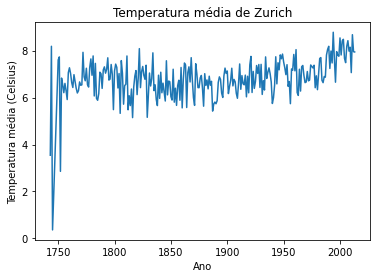

In [6]:
## Por fim, utilizaremos o matplotib para plotar os gráficos a partir dos dados agrupados.
## Esse gráfico mostra a evolução da temperatura média por ano em uma cidade específica.

dados_cidade = dados_agrupados.loc[(slice(None), "Zurich"), :]
dados_cidade = dados_cidade.reset_index(level=0)

plt.plot(dados_cidade["year"], dados_cidade["AverageTemperature"])
plt.xlabel("Ano")
plt.ylabel("Temperatura média (Celsius)")
plt.title("Temperatura média de Zurich")
plt.show()


#### Podemos gerar uma figura para cada cidade em "cidades", deixarei essa célula como Markdown

``` Python
def Grafico(cidade):
    dados_cidade = dados_agrupados.loc[(slice(None), cidade), :]
    dados_cidade = dados_cidade.reset_index(level=0)

    plt.plot(dados_cidade["year"], dados_cidade["AverageTemperature"])
    plt.xlabel("Ano")
    plt.ylabel("Temperatura média (Celsius)")
    plt.title("Temperatura média de "+ cidade)
    plt.show()


for city in cidades:
    Grafico(city) 

## Análise de variação de temperatura entre as cidades

In [58]:
## Queremos calcular a diferença de temperatura entre o ano mais recente e o ano mais antigo para cada 
## cidade. Para fazer isso, vamos utilizar o método .agg() do pandas para calcular a diferença entre o 
## valor mínimo e máximo da temperatura para cada cidade.

dados_agrupados = dados.groupby(["City"]).agg({"year": ["min","max"], "AverageTemperature": ["min","max"]})



In [59]:
## Vamos calcular a diferença entre a temperatura mínima e máxima para cada cidade.
dados_agrupados["dif"] = dados_agrupados["AverageTemperature"]["max"] - dados_agrupados["AverageTemperature"]["min"]


In [60]:
## Vamos ordenar o dataframe pelo valor da diferença em ordem crescente
dados_agrupados.sort_values(by="dif",ascending=False,inplace=True)

In [61]:
## Selecionamos as cidades com maiores diferenças de temperaturas
top_cities = dados_agrupados.head(10)

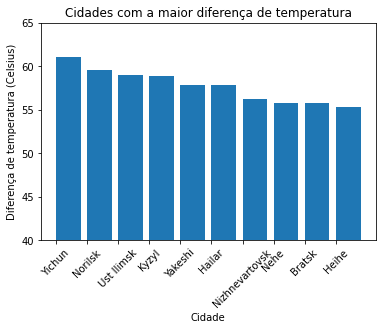

In [64]:
## Por fim, plotamos um gráfico de barras para analisar essa diferença
plt.bar(top_cities.index, top_cities["dif"], width = 0.8, align = 'edge')
plt.xlabel("Cidade")
plt.ylabel("Diferença de temperatura (Celsius)")
plt.title("Cidades com a maior diferença de temperatura")
plt.ylim(40,65)
plt.xticks(rotation=45)
plt.show()